<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-16 08:37:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  45.3MB/s    in 4.5s    

2025-04-16 08:37:19 (45.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


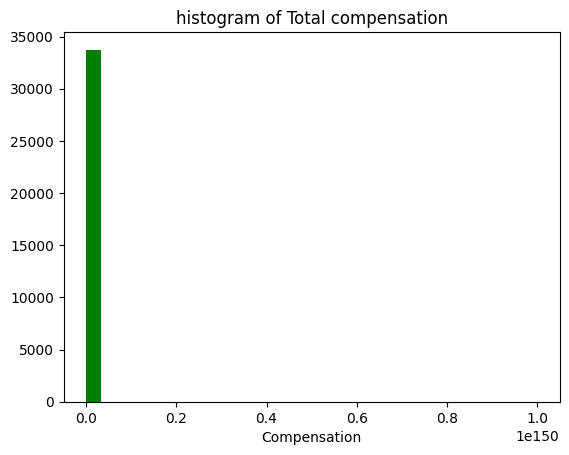

In [9]:
## Write your code here
query = """
select CompTotal 
from main
where CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(query, conn)
plt.hist(df_comp, bins=30,color = 'green' )
plt.title('histogram of Total compensation')
plt.xlabel('Compensation')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


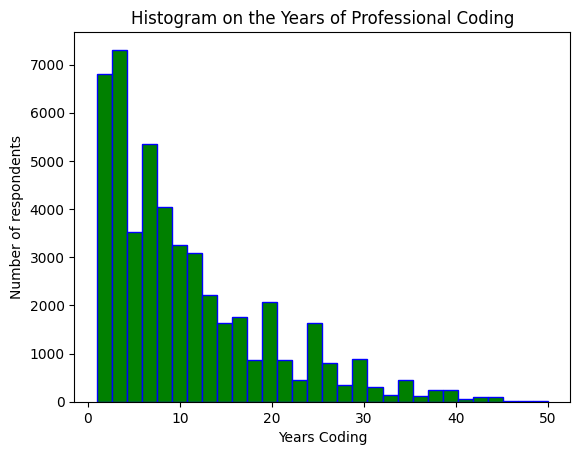

In [10]:
## Write your code here
query="""
select YearsCodePro from main
where YearsCodePro IS NOT NULL
and YearsCodePro !=''
and YearsCodePro !='NA'
"""
dfYearsCode = pd.read_sql_query(query, conn)
dfYearsCode['YearsCodeProNum'] = pd.to_numeric(dfYearsCode['YearsCodePro'], errors= 'coerce')
plt.hist(dfYearsCode['YearsCodeProNum'], bins = 30, color = 'green', edgecolor='blue')
plt.title('Histogram on the Years of Professional Coding')
plt.xlabel('Years Coding')
plt.ylabel('Number of respondents')
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


float64


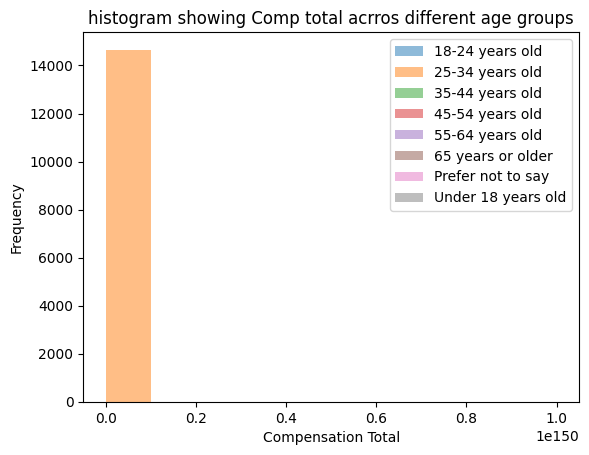

In [11]:
## Write your code here
dfComAge = pd.read_sql_query("""
select Age, CompTotal
from main
where CompTotal is not NULL and CompTotal !='' and CompTotal !='NA'
and Age is not NULL and Age !='' and Age !='NA'
""", conn)
print(dfComAge['CompTotal'].dtypes)

agegroup = dfComAge.groupby('Age')

for name, group in agegroup:
    plt.hist(group['CompTotal'], alpha=0.5, label=name)

plt.title('histogram showing Comp total acrros different age groups')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Compensation Total')
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


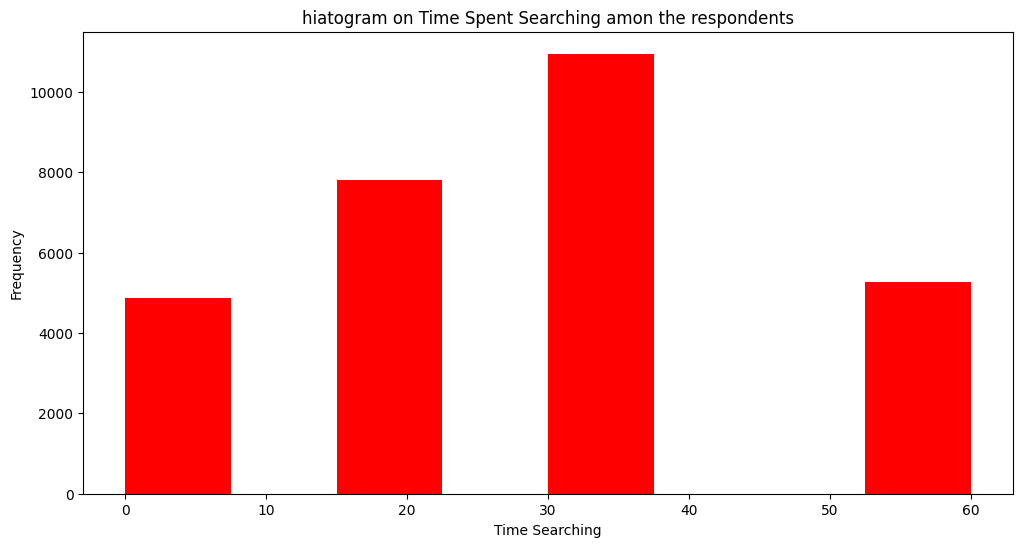

In [12]:
## Write your code here
query = """
select 
CAST(TimeSearching as NUMERIC) as TimeSearching
from main
where TimeSearching IS NOT NULL and TimeSearching !='' and TimeSearching !=''
"""
dfT = pd.read_sql_query(query, conn)
plt.figure(figsize=(12, 6))
plt.hist(dfT['TimeSearching'], bins=8, color= 'red')
plt.title('hiatogram on Time Spent Searching amon the respondents')
plt.xlabel('Time Searching')
plt.ylabel('Frequency')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


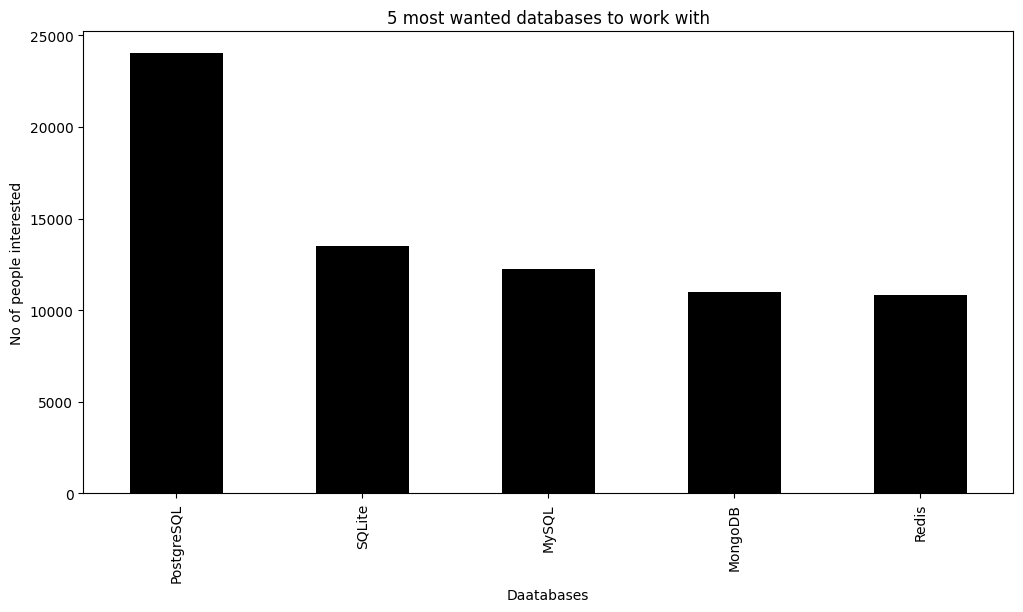

In [22]:
## Write your code here
query = """
Select DatabaseWantTOWorkWith
from main
where DatabaseWantTOWorkWith is not NULL
AND DatabaseWantToWorkWith != ''
AND DatabaseWantToWorkWith != 'NA'
"""
dfDB = pd.read_sql_query(query, conn)
DAta = dfDB['DatabaseWantToWorkWith'].str.split(';', expand=True).stack()
topDB = DAta.value_counts().head(5)
print(topDB)
plt.figure(figsize=(12, 6))
topDB.plot(kind='bar', color= 'black')
plt.title('5 most wanted databases to work with')
plt.xlabel('Daatabases')
plt.ylabel('No of people interested')
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


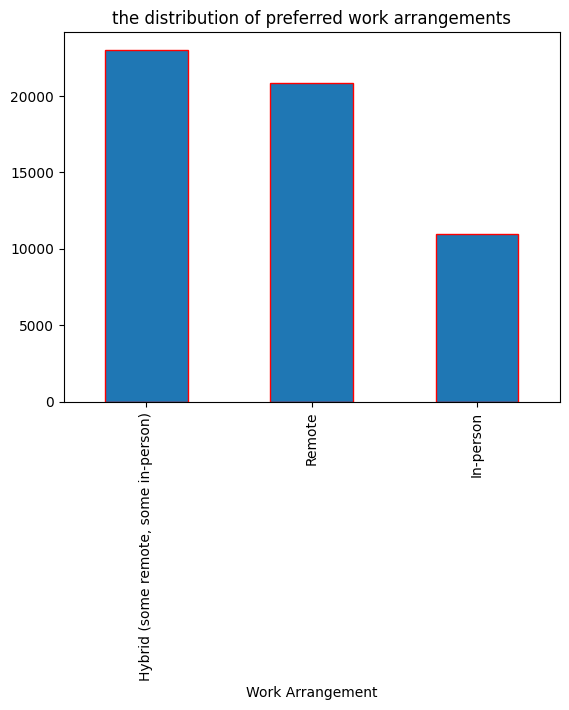

In [34]:
## Write your code here
Remote = pd.read_sql_query("""
select RemoteWork
from main
where RemoteWork is NOT NULL
and RemoteWork !=''
AND RemoteWork !='NA'
""", conn)
Remote['RemoteWork'].value_counts().plot(kind='bar', edgecolor='red')
plt.title('the distribution of preferred work arrangements')
plt.xlabel('Work Arrangement')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


131000.0


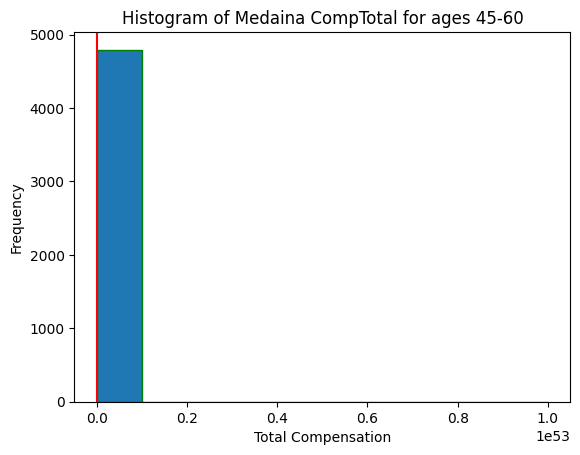

In [63]:
## Write your code here
dfCompTotal = pd.read_sql_query("""
select CompTotal, Age
from main
where CompTotal is not NULL 
and CompTotal !=''
and CompTotal !='NA'
AND Age is not NULL
and Age !=''
and Age !='NA'
""", conn)

filtereddf = dfCompTotal[dfCompTotal['Age'].isin(['45-54 years old', '55-64 years old'])]
medianComp = filtereddf['CompTotal'].median()
print(medianComp)
plt.hist(filtereddf['CompTotal'], bins=10, edgecolor='green')
plt.title('Histogram of Medaina CompTotal for ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.axvline(medianComp, color='red')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


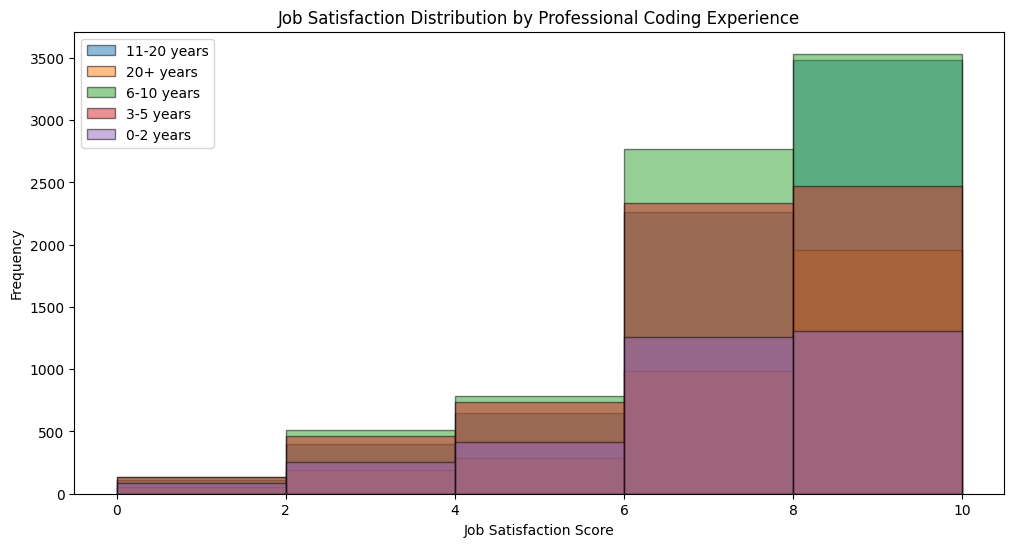

In [49]:
## Write your code here
QUERY = """
SELECT YearsCodePro, JobSat 
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro and JobSat to numeric, removing any non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')


df = df.dropna(subset=['YearsCodePro', 'JobSat'])


df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], 
                                bins=[-1, 2, 5, 10, 20, 100], 
                                labels=['0-2 years', '3-5 years', '6-10 years', '11-20 years', '20+ years'])

plt.figure(figsize=(12, 6))
for exp_group in df['ExperienceGroup'].unique():
    subset = df[df['ExperienceGroup'] == exp_group]
    plt.hist(subset['JobSat'], bins=5, alpha=0.5, label=exp_group, edgecolor='black')

plt.title('Job Satisfaction Distribution by Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
